In [2]:
summery_path = 'C:/EDITH_IRWA/BBC News Summary/BBC News Summary/Summaries'
paragraph_path = 'C:/EDITH_IRWA/BBC News Summary/BBC News Summary/News Articles'

In [3]:
import os 
import pandas as pd
datalist = []
i = 0


In [4]:
for folder in os.listdir(summery_path):
    summery_foldernames_one = os.path.join(summery_path,folder)
    paragraph_foldernames_one = os.path.join(paragraph_path,folder)
   
    summery_file_list =  os.listdir(summery_foldernames_one)
    paragraph_file_list = os.listdir(paragraph_foldernames_one)
        
    for selected_file in paragraph_file_list:
            selected_summery_file = os.path.join(summery_foldernames_one,selected_file)
            selected_paragraph_file = os.path.join(paragraph_foldernames_one,selected_file)

            
            with open(selected_summery_file,'r',encoding='utf-8', errors='ignore') as summery_read:
                with open(selected_paragraph_file,'r',encoding='utf-8', errors='ignore') as paragraph_read:
                    datalist.append([folder,paragraph_read.read(),summery_read.read()])




data_set = pd.DataFrame(datalist, columns=['category', 'paragraph', 'summary'])

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/EDITH_IRWA/BBC News Summary/BBC News Summary/Summaries\\._business'

In [105]:

data_set.head()


,category,paragraph,summary
0,entertainment,Musicians to tackle US red tape\n\nMusicians' ...,Nigel McCune from the Musicians' Union said Br...
1,entertainment,"U2's desire to be number one\n\nU2, who have w...",But they still want more.They have to want to ...
2,entertainment,Rocker Doherty in on-stage fight\n\nRock singe...,"Babyshambles, which he formed after his acrimo..."
3,entertainment,Snicket tops US box office chart\n\nThe film a...,A Series of Unfortunate Events also stars Scot...
4,entertainment,Ocean's Twelve raids box office\n\nOcean's Twe...,"Ocean's Twelve, the crime caper sequel starrin..."


In [106]:
output_file_path = 'C:/EDITH_IRWA/dataset.csv'
data_set.to_csv(output_file_path, index=False, encoding='utf-8')

In [107]:
data_set.isnull().sum()

category     0
paragraph    0
summary      0
dtype: int64

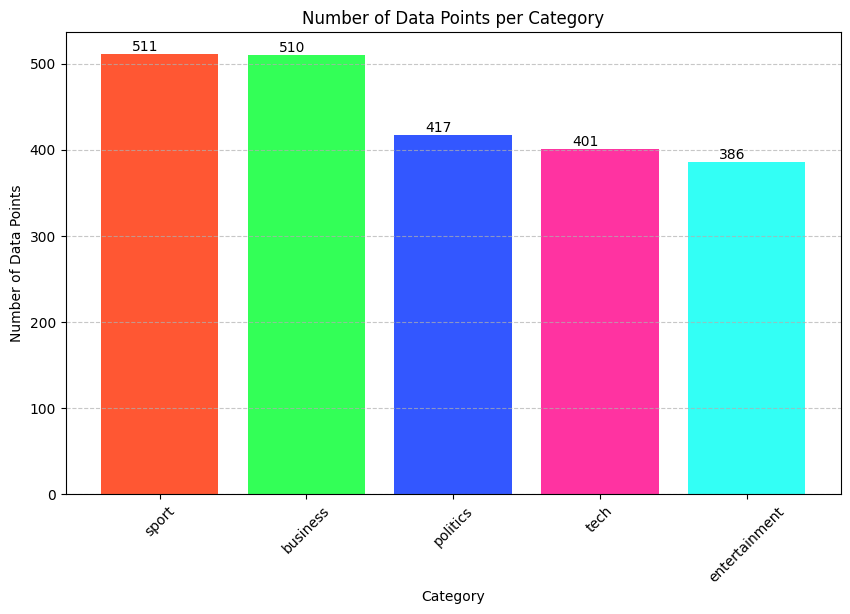

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')

category_counts = df['category'].value_counts()

bright_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFF5'] 

plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values, color=bright_colors)

plt.title('Number of Data Points per Category')
plt.xlabel('Category')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, count in zip(bars, category_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height(), count, ha='center', va='bottom')

plt.show()


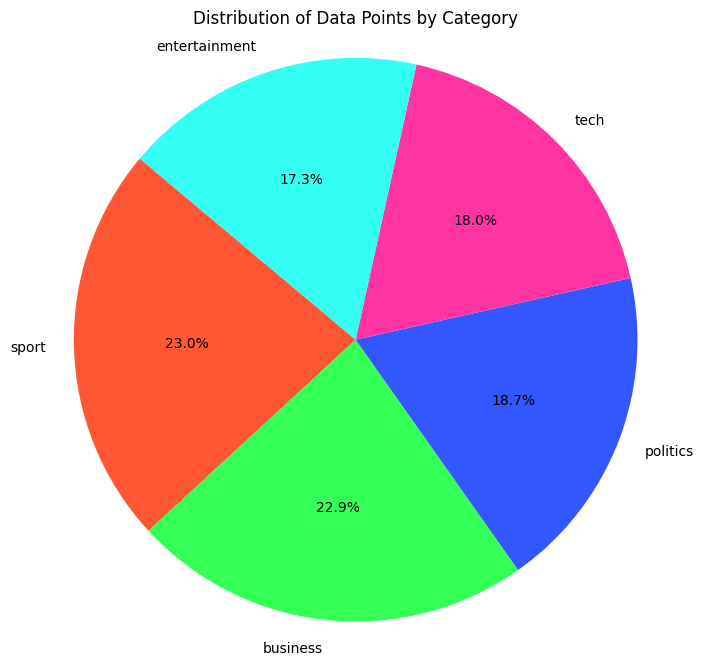

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv('dataset.csv')

# Group by 'category' and count the number of entries
category_counts = df['category'].value_counts()

# Define a list of bright colors
bright_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFF5']  # Adjust as needed

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, colors=bright_colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Data Points by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

# Show the pie chart
plt.show()


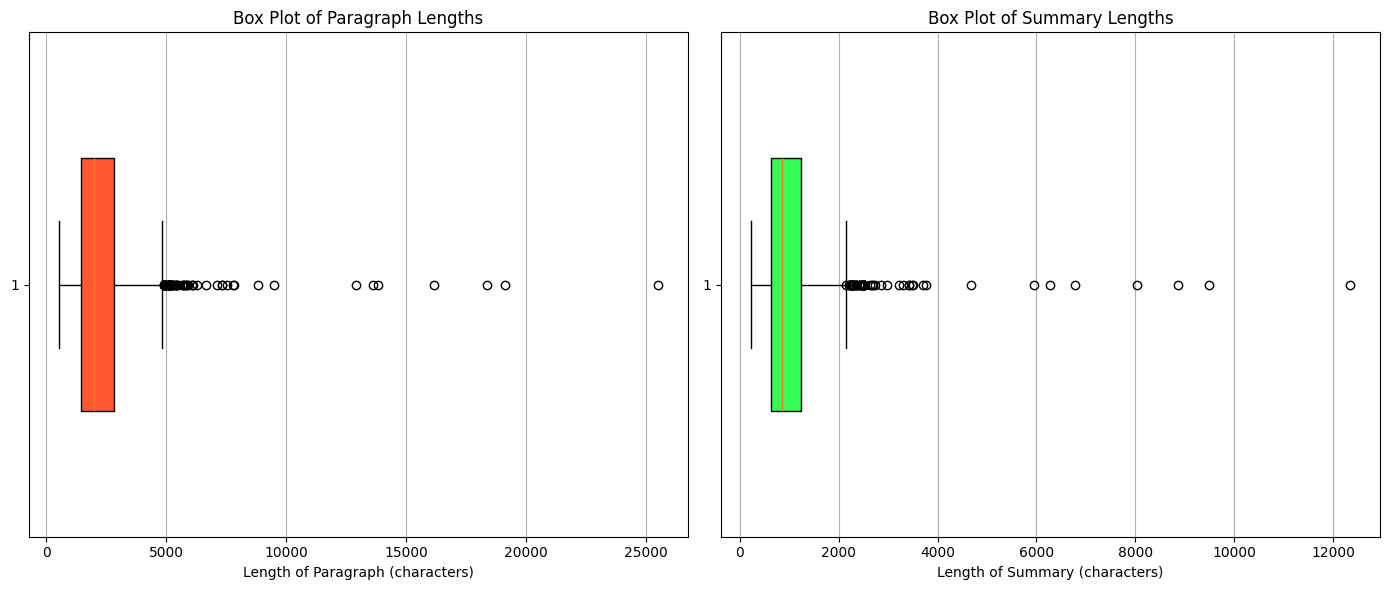

In [125]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('dataset.csv')

df['paragraph_length'] = df['paragraph'].apply(len) 
df['summary_length'] = df['summary'].apply(len)      

fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax[0].boxplot(df['paragraph_length'], vert=False, patch_artist=True, 
               boxprops=dict(facecolor='#FF5733'), widths=0.5)  
ax[0].set_title('Box Plot of Paragraph Lengths')
ax[0].set_xlabel('Length of Paragraph (characters)')
ax[0].grid(axis='x')


ax[1].boxplot(df['summary_length'], vert=False, patch_artist=True, 
               boxprops=dict(facecolor='#33FF57'), widths=0.5)  
ax[1].set_title('Box Plot of Summary Lengths')
ax[1].set_xlabel('Length of Summary (characters)')
ax[1].grid(axis='x')

plt.tight_layout()
plt.show()


In [114]:
pip install pandas matplotlib


  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl (251 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-macosx_11_0_arm64.whl (2.3 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl (63 kB)
Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.4-py3-none-any.

In [119]:
data_set.duplicated().sum()

98

In [120]:
df_no_duplicates = data_set.drop_duplicates()

In [121]:
data_set.shape  

(2225, 3)

In [122]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   2225 non-null   object
 1   paragraph  2225 non-null   object
 2   summary    2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


In [1]:
!pip install --upgrade evaluate datasets


In [2]:
pip install rouge_score


In [3]:
pip install mittens


In [4]:
pip install Corpus

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import word2vec
from mittens import GloVe
import logging
import Corpus

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [102]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [8]:
class Preprocess():
    def __init__(self):
        pass

    def toLower(self, x):
        '''Converts string to lowercase'''
        return x.lower()

    def sentenceTokenize(self, x):
        '''Tokenizes document into sentences'''
        sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
        sentences = sent_tokenizer.tokenize(x)
        return sentences

    def preprocess_sentences(self, all_sentences):
        '''Tokenizes sentences into words, removes punctuations, stopwords and performs lemmatization'''
        word_tokenizer = nltk.RegexpTokenizer(r"\w+")
        sentences = []
        special_characters = re.compile("[^A-Za-z0-9 ]")
        for s in all_sentences:
            # remove punctuation
            s = re.sub(special_characters, " ", s)
            # Word tokenize
            words = word_tokenizer.tokenize(s)
            # Remove Stopwords
            words = self.removeStopwords(words)
            # Perform lemmatization
            words = self.wordnet_lemmatize(words)
            sentences.append(words)
        return sentences

    def removeStopwords(self, sentence):
        '''Removes stopwords from a sentence'''
        stop_words = stopwords.words('english')
        tokens = [token for token in sentence if token not in stop_words]
        return tokens

    def wordnet_lemmatize(self, sentence):
        '''Lemmatizes tokens in a sentence'''
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token, pos='v') for token in sentence]
        return tokens

    def complete_preprocess(self, text):
        '''Performs complete preprocessing on document'''
        # Convert text to lowercase
        text_lower = self.toLower(text)
        # Sentence tokenize the document
        sentences = self.sentenceTokenize(text_lower)
        # Preprocess all sentences
        preprocessed_sentences = self.preprocess_sentences(sentences)
        return preprocessed_sentences


In [9]:
preprocessor = Preprocess()

df['cleaned_paragraph'] = df['paragraph'].apply(preprocessor.complete_preprocess)
df['cleaned_summary'] = df['summary'].apply(preprocessor.complete_preprocess)


In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


In [11]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/pyth

In [12]:
def encode_data(batch):
    # Combine the tokenized words back into a single string for input
    paragraph = ' '.join([' '.join(words) for words in batch['cleaned_paragraph']])

    # Combine the tokenized words back into a single string for output
    summary = ' '.join([' '.join(words) for words in batch['cleaned_summary']])

    # Tokenize the preprocessed 'cleaned_paragraph' (input text)
    inputs = tokenizer(
        paragraph,                      # Preprocessed paragraph
        padding='max_length',           # Pad to max length
        truncation=True,                # Truncate if it's longer than max length
        max_length=1200,                 # Set max token length for input
        return_tensors="pt"             # Return as PyTorch tensors
    )

    # Tokenize the preprocessed 'cleaned_summary' (target text)
    outputs = tokenizer(
        summary,                        # Preprocessed summary
        padding='max_length',           # Pad to max length
        truncation=True,                # Truncate to max length
        max_length=350,                 # Set max token length for summary
        return_tensors="pt"             # Return as PyTorch tensors
    )

    # Return a single dictionary (to avoid unpacking errors)
    return {
        'input_ids': inputs['input_ids'].squeeze(),          # Input IDs (tokenized input)
        'attention_mask': inputs['attention_mask'].squeeze(),# Attention mask for input
        'labels': outputs['input_ids'].squeeze()             # Target/labels (tokenized summary)
    }

# Apply the encode_data function to the train and test data
train_data_encoded = train_data.apply(encode_data, axis=1)
test_data_encoded = test_data.apply(encode_data, axis=1)


In [13]:
print(train_data_encoded.head())
print(test_data_encoded.head())


1490    {'input_ids': [tensor(3), tensor(4605), tensor...
2001    {'input_ids': [tensor(3), tensor(2160), tensor...
1572    {'input_ids': [tensor(19299), tensor(17), tens...
1840    {'input_ids': [tensor(3303), tensor(358), tens...
610     {'input_ids': [tensor(613), tensor(1170), tens...
dtype: object
414     {'input_ids': [tensor(20576), tensor(420), ten...
420     {'input_ids': [tensor(17907), tensor(1487), te...
1644    {'input_ids': [tensor(3), tensor(1167), tensor...
416     {'input_ids': [tensor(873), tensor(217), tenso...
1232    {'input_ids': [tensor(10505), tensor(647), ten...
dtype: object


In [14]:
train_data_encoded.reset_index(drop=True, inplace=True)
test_data_encoded.reset_index(drop=True, inplace=True)


In [15]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,  
    log_level='info',  
    fp16=True,
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data_encoded,
    eval_dataset=test_data_encoded,
)

# Start training
trainer.train()


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
Using auto half precision backend
***** Running training *****
  Num examples = 1,780
  Num Epochs = 5
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 4,450
  Number of trainable parameters = 222,903,552


Epoch,Training Loss,Validation Loss
1,0.363500,0.283221
2,0.301400,0.257820
3,0.210700,0.247260
4,0.339700,0.242577
5,0.293800,0.240755


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Configuration saved in ./results/checkpoint-500/generation_config.json
Model weights saved in ./results/checkpoint-500/model.safetensors

***** Running Evaluation *****
  Num examples = 445
  Batch size = 2
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Configuration saved in ./results/checkpoint-1000/generation_config.json
Model weights saved in ./results/checkpoint-1000/model.safetensors
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Configuration saved in ./results/checkpoint-1500/generation_config.json
Model weights saved in ./results/checkpoint-1500/model.safetensors

***** Running Evaluation *****
  Num examples = 445
  Batch size = 2
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/con

TrainOutput(global_step=4450, training_loss=0.377561998608407, metrics={'train_runtime': 3437.8578, 'train_samples_per_second': 2.589, 'train_steps_per_second': 1.294, 'total_flos': 1.27024809984e+16, 'train_loss': 0.377561998608407, 'epoch': 5.0})

In [16]:
import evaluate

# Load the Rouge metric from the evaluate library
rouge = evaluate.load("rouge")

def evaluate_model(batch):
    predictions, labels = batch
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge metric expects a list of strings
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    return result


In [17]:
import torch
import evaluate

# Load the Rouge metric from the evaluate library
rouge = evaluate.load("rouge")

# Define the evaluation function
def evaluate_model(batch):
    predictions = batch["input_ids"]
    labels = batch["labels"]

    # Decode predictions and labels to text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute Rouge metric
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    return result

# Evaluate the model's predictions using the test dataset
test_dataloader = torch.utils.data.DataLoader(test_data_encoded, batch_size=2)

for batch in test_dataloader:
    results = evaluate_model(batch)
    print("ROUGE Score: ", results)


ROUGE Score:  {'rouge1': 0.5892091669488412, 'rouge2': 0.5562139665741004, 'rougeL': 0.3318300036742722, 'rougeLsum': 0.3318300036742722}
ROUGE Score:  {'rouge1': 0.6620702251038766, 'rouge2': 0.6290511398644485, 'rougeL': 0.3149551770847602, 'rougeLsum': 0.3149551770847602}
ROUGE Score:  {'rouge1': 0.644520759036675, 'rouge2': 0.6140345645139645, 'rougeL': 0.3899969180645445, 'rougeLsum': 0.3899969180645445}
ROUGE Score:  {'rouge1': 0.6220474303625289, 'rouge2': 0.5775295742508857, 'rougeL': 0.3826482938080312, 'rougeLsum': 0.3826482938080312}
ROUGE Score:  {'rouge1': 0.6506296135475467, 'rouge2': 0.609777636482453, 'rougeL': 0.4239687364307425, 'rougeLsum': 0.4239687364307425}
ROUGE Score:  {'rouge1': 0.4867928083710207, 'rouge2': 0.4376780265928102, 'rougeL': 0.27216901658242443, 'rougeLsum': 0.27216901658242443}
ROUGE Score:  {'rouge1': 0.6255625617445817, 'rouge2': 0.580957669998766, 'rougeL': 0.338872559183325, 'rougeLsum': 0.338872559183325}
ROUGE Score:  {'rouge1': 0.5733982157

In [18]:
# Initialize storage for scores
rouge_scores = []

for batch in test_dataloader:
    results = evaluate_model(batch)
    rouge_scores.append(results)

# Average the scores
avg_rouge = {key: sum(d[key] for d in rouge_scores) / len(rouge_scores) for key in rouge_scores[0].keys()}

print("Average ROUGE Scores:")
for key, value in avg_rouge.items():
    print(f"{key}: {value:.4f}")


Average ROUGE Scores:
rouge1: 0.6180
rouge2: 0.5785
rougeL: 0.3752
rougeLsum: 0.3752


In [19]:
# Save the trained model and tokenizer
model.save_pretrained('/content')
tokenizer.save_pretrained('/content')


Configuration saved in /content/config.json
Configuration saved in /content/generation_config.json
Model weights saved in /content/model.safetensors
tokenizer config file saved in /content/tokenizer_config.json
Special tokens file saved in /content/special_tokens_map.json
added tokens file saved in /content/added_tokens.json


('/content/tokenizer_config.json',
 '/content/special_tokens_map.json',
 '/content/spiece.model',
 '/content/added_tokens.json')

In [1]:
# Load the saved model and tokenizer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model = AutoModelForSeq2SeqLM.from_pretrained('/Users/sharumathan/Desktop/EDITH_IRWA/model_token_folder')
tokenizer = AutoTokenizer.from_pretrained('/Users/sharumathan/Desktop/EDITH_IRWA/model_token_folder')

def summarize_text(input_text):
    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)

    # Determine input length and adjust max_length dynamically
    input_length = len(input_text.split())  # Count words in the input
    max_summary_length = min(350, int(input_length * 0.7))  # Set a maximum summary length (70% of input length)
    min_summary_length = min(100, int(input_length * 0.3))  # Set a minimum summary length (30% of input length)

    # Generate the summary
    summary_ids = model.generate(
        inputs['input_ids'], 
        max_length=max_summary_length, 
        min_length=min_summary_length, 
        length_penalty=2.0, 
        num_beams=4, 
        early_stopping=True
    )
    
    # Decode and return the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary





/Users/sharumathan/Desktop/EDITH_IRWA/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [3]:
input_text = "Ink helps drive democracy in Asia The Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country's elections as part of a drive to prevent multiple voting. This new technology is causing both worries and guarded optimism among different sectors of the population. In an effort to live up to its reputation in the 1990s as 'an island of democracy', the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections. The US government agreed to fund all expenses associated with this decision. The Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies. The use of ink is only one part of a general effort to show commitment towards more open elections - the German Embassy, the Soros Foundation and the Kyrgyz government have all contributed to purchase transparent ballot boxes. The actual technology behind the ink is not that complicated. The ink is sprayed on a person's left thumb. It dries and is not visible under normal light. However, the presence of ultraviolet light (of the kind used to verify money) causes the ink to glow with a neon yellow light. At the entrance to each polling station, one election official will scan voter's fingers with UV lamp before allowing them to enter, and every voter will have his/her left thumb sprayed with ink before receiving the ballot. If the ink shows under the UV light the voter will not be allowed to enter the polling station. Likewise, any voter who refuses to be inked will not receive the ballot. These elections are assuming even greater significance because of two large factors - the upcoming parliamentary elections are a prelude to a potentially regime changing presidential election in the Autumn as well as the echo of recent elections in other former Soviet Republics, notably Ukraine and Georgia. The use of ink has been controversial - especially among groups perceived to be pro-government. Widely circulated articles compared the use of ink to the rural practice of marking sheep - a still common metaphor in this primarily agricultural society. The author of one such article began a petition drive against the use of the ink. The greatest part of the opposition to ink has often been sheer ignorance. Local newspapers have carried stories that the ink is harmful, radioactive or even that the ultraviolet readers may cause health problems. Others, such as the aggressively middle of the road, Coalition of Non-governmental Organizations, have lauded the move as an important step forward. This type of ink has been used in many elections in the world, in countries as varied as Serbia, South Africa, Indonesia and Turkey. The other common type of ink in elections is indelible visible ink - but as the elections in Afghanistan showed, improper use of this type of ink can cause additional problems. The use of 'invisible' ink is not without its own problems. In most elections, numerous rumors have spread about it. In Serbia, for example, both Christian and Islamic leaders assured their populations that its use was not contrary to religion. Other rumours are associated with how to remove the ink - various soft drinks, solvents and cleaning products are put forward. However, in reality, the ink is very effective at getting under the cuticle of the thumb and difficult to wash off. The ink stays on the finger for at least 72 hours and for up to a week. The use of ink and readers by itself is not a panacea for election ills. The passage of the inking law is, nevertheless, a clear step forward towards free and fair elections. The country's widely watched parliamentary elections are scheduled for 27 February. David Mikosz works for the IFES, an international, non-profit organisation that supports the building of democratic societies."

summary = summarize_text(input_text)
print("Summary: ", summary)


Summary:  the use of ink is causing both worries and guarded optimism among different sectors of the population - the upcoming parliamentary elections are a prelude to a potentially regime changing presidential election in the Autumn. the use of ink has been controversial - especially among groups perceived to be pro-government. the use of ink is sprayed on a person's left thumb and is not visible under normal light. the presence of ultraviolet light causes the ink to glow with a neon yellow light.


In [25]:
model.save_pretrained('/content/drive/MyDrive/Colab Notebooks/model_token_folder')
tokenizer.save_pretrained('/content/drive/MyDrive/Colab Notebooks/model_token_folder')

Configuration saved in /content/drive/MyDrive/Colab Notebooks/model_token_folder/config.json
Configuration saved in /content/drive/MyDrive/Colab Notebooks/model_token_folder/generation_config.json
Model weights saved in /content/drive/MyDrive/Colab Notebooks/model_token_folder/model.safetensors
tokenizer config file saved in /content/drive/MyDrive/Colab Notebooks/model_token_folder/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/Colab Notebooks/model_token_folder/special_tokens_map.json
Copy vocab file to /content/drive/MyDrive/Colab Notebooks/model_token_folder/spiece.model


('/content/drive/MyDrive/Colab Notebooks/model_token_folder/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/model_token_folder/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/model_token_folder/spiece.model',
 '/content/drive/MyDrive/Colab Notebooks/model_token_folder/added_tokens.json',
 '/content/drive/MyDrive/Colab Notebooks/model_token_folder/tokenizer.json')

In [1]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

def analyze_sentiment(text):
    """Analyze sentiment of the input text."""
    return sentiment_pipeline(text)

# Example usage
sentiment_result = analyze_sentiment("The movie was fantastic!")
print(sentiment_result)


/Users/sharumathan/Desktop/EDITH_IRWA/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Users/sharumathan/Desktop/EDITH_IRWA/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Ha

[{'label': 'POSITIVE', 'score': 0.9998776912689209}]


In [3]:
pip install rake-nltk


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [1]:
from transformers import pipeline

# Load a pre-trained sentiment-analysis model
sentiment_pipeline = pipeline('sentiment-analysis')

# Analyze sentiment of a text
text = "I love using this summarization system, it's very useful!"
sentiment = sentiment_pipeline(text)
print(sentiment)


/Users/sharumathan/Desktop/EDITH_IRWA/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Users/sharumathan/Desktop/EDITH_IRWA/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Ha

[{'label': 'POSITIVE', 'score': 0.9997581839561462}]


In [6]:
#pip install transformers yake gensim nltk
import yake

# Initialize the keyword extractor
kw_extractor = yake.KeywordExtractor()

# Extract keywords from a text
text = "Hii sharuk enna seireenga inga saapdacha"
keywords = kw_extractor.extract_keywords(text)

# Print extracted keywords
for kw, score in keywords:
    print(f"Keyword: {kw}, Score: {score}")


Keyword: Hii sharuk enna, Score: 0.01655915082773619
Keyword: seireenga inga saapdacha, Score: 0.016559150827736194
Keyword: sharuk enna seireenga, Score: 0.03339840940482845
Keyword: enna seireenga inga, Score: 0.03339840940482845
Keyword: Hii sharuk, Score: 0.04940384002065631
Keyword: inga saapdacha, Score: 0.04940384002065631
Keyword: sharuk enna, Score: 0.09700399286574239
Keyword: enna seireenga, Score: 0.09700399286574239
Keyword: seireenga inga, Score: 0.09700399286574239
Keyword: Hii, Score: 0.15831692877998726
Keyword: saapdacha, Score: 0.15831692877998726
Keyword: sharuk, Score: 0.29736558256021506
Keyword: enna, Score: 0.29736558256021506
Keyword: seireenga, Score: 0.29736558256021506
Keyword: inga, Score: 0.29736558256021506


In [40]:
import yake

# Initialize the keyword extractor
kw_extractor = yake.KeywordExtractor()

# Example of a longer paragraph
text = """Natural language processing (NLP) is a subfield of artificial intelligence 
that focuses on the interaction between computers and humans through natural language. 
The ultimate objective of NLP is to enable computers to understand, interpret, 
and generate human language in a way that is both valuable and meaningful. 
NLP combines computational linguistics—rule-based modeling of human language 
with machine learning, statistical, and deep learning models. Applications 
of NLP include sentiment analysis, machine translation, and information extraction."""

# Extract keywords from the larger text
keywords = kw_extractor.extract_keywords(text)

# Print extracted keywords with filtering
filtered_keywords = [(kw, score) for kw, score in keywords if score > 0.03]  # Example threshold
top_keywords = sorted(filtered_keywords, key=lambda x: x[1])[:10]  # Limit to top 10 keywords

for kw, score in top_keywords:
    print(f"Keyword: {kw}, Score: {score}")


Keyword: Natural language, Score: 0.03348306375921797
Keyword: subfield of artificial, Score: 0.04307080430887413
Keyword: artificial intelligence, Score: 0.04307080430887413
Keyword: intelligence that focuses, Score: 0.04307080430887413
Keyword: NLP, Score: 0.057735347218260846
Keyword: language processing, Score: 0.06279687706999357
Keyword: human language, Score: 0.08192603037752758
Keyword: Natural, Score: 0.08381004228908419
Keyword: language, Score: 0.09360919412123363
Keyword: generate human language, Score: 0.10348558939680262


In [41]:
pip install gensim nltk


Note: you may need to restart the kernel to use updated packages.


In [74]:
import spacy
from nltk.corpus import stopwords
import gensim
from gensim import corpora

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Ensure you have the necessary NLTK data
#nltk.download('stopwords')

# Sample documents for topic modeling
documents = [
    "Artificial intelligence (AI) has emerged as a transformative force in various industries, reshaping the way businesses operate and interact with customers. By leveraging advanced algorithms and vast amounts of data, AI systems can analyze patterns, make predictions, and automate tasks that were traditionally performed by humans. For instance, in the healthcare sector, AI is being used to enhance diagnostic accuracy and personalize treatment plans, while in finance, it helps in detecting fraudulent transactions and managing risks more effectively. As AI continues to evolve, it holds the promise of driving innovation, improving efficiency, and delivering better outcomes across multiple domains."]
# Preprocess the documents
stop_words = set(stopwords.words('english'))
dic_of_topics = dict()
preprocessed_docs = []
for doc in documents:
    # Use spaCy for tokenization
    doc_nlp = nlp(doc.lower())  # Tokenize and lower case
    tokens = [token.text for token in doc_nlp if token.is_alpha and token.text not in stop_words]  # Remove punctuation and stopwords
    preprocessed_docs.append(tokens)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(preprocessed_docs)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

# Perform LDA
num_topics = 2  # You can choose the number of topics you want
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display the topics in a user-friendly format
print("Topics and Keywords:")
for idx, topic in lda_model.print_topics(-1):
    # Format topic output
    topic_keywords = topic.split(" + ")
    formatted_keywords = []
    for keyword in topic_keywords:
        weight, word = keyword.split("*")
        formatted_keywords.append(f"{word.strip()} (Weight: {float(weight):.3f})")
    
    print(f"** Topic {idx + 1} **")
    print(", ".join(formatted_keywords))
    print()  # Print a newline for better readability

# Example to get the topic distribution for a new document
new_doc = "I want to build a system that understands human languages."
new_doc_nlp = nlp(new_doc.lower())  # Tokenize and lower case
new_doc_tokens = [token.text for token in new_doc_nlp if token.is_alpha and token.text not in stop_words]  # Remove punctuation and stopwords
new_doc_bow = dictionary.doc2bow(new_doc_tokens)

# Topic distribution for the new document
topic_distribution = lda_model.get_document_topics(new_doc_bow)
print("\nTopic Distribution for the new document:")
for topic_id, prob in topic_distribution:
    print(f"Topic {topic_id + 1}: Probability {prob:.3f}")


Topics and Keywords:
** Topic 1 **
"ai" (Weight: 0.047), "tasks" (Weight: 0.016), "diagnostic" (Weight: 0.016), "finance" (Weight: 0.016), "innovation" (Weight: 0.016), "plans" (Weight: 0.016), "data" (Weight: 0.016), "promise" (Weight: 0.016), "continues" (Weight: 0.016), "personalize" (Weight: 0.016)

** Topic 2 **
"ai" (Weight: 0.016), "advanced" (Weight: 0.016), "helps" (Weight: 0.016), "treatment" (Weight: 0.016), "reshaping" (Weight: 0.016), "vast" (Weight: 0.016), "make" (Weight: 0.016), "industries" (Weight: 0.016), "businesses" (Weight: 0.016), "healthcare" (Weight: 0.016)


Topic Distribution for the new document:
Topic 1: Probability 0.500
Topic 2: Probability 0.500


In [59]:
import gensim
import scipy

print("Gensim version:", gensim.__version__)
print("Scipy version:", scipy.__version__)


Gensim version: 4.3.3
Scipy version: 1.13.1


In [58]:

from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocessed_docs, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.9999999999999998


In [91]:
import spacy
from nltk.corpus import stopwords
import gensim
from gensim import corpora

def get_topic(text):

    # Load the spaCy English model
    nlp = spacy.load("en_core_web_sm")

    # Ensure you have the necessary NLTK data
    #nltk.download('stopwords')

    # Sample documents for topic modeling
    documents = [text]# Preprocess the documents
    stop_words = set(stopwords.words('english'))
    dic_of_topics = dict()
    preprocessed_docs = []
    for doc in documents:
        # Use spaCy for tokenization
        doc_nlp = nlp(doc.lower())  # Tokenize and lower case
        tokens = [token.text for token in doc_nlp if token.is_alpha and token.text not in stop_words]  # Remove punctuation and stopwords
        preprocessed_docs.append(tokens)

    # Create a dictionary and corpus for LDA
    dictionary = corpora.Dictionary(preprocessed_docs)
    corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

    # Perform LDA
    num_topics = 2  # You can choose the number of topics you want
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Display the topics in a user-friendly format
    print("Topics and Keywords:")
    for idx, topic in lda_model.print_topics(-1):
        # Format topic output
        topic_keywords = topic.split(" + ")
        formatted_keywords = []
        for keyword in topic_keywords:
            weight, word = keyword.split("*")
            formatted_keywords.append(f"{word.strip()} (Weight: {float(weight):.3f})")
        
        dic_of_topics[f"Topic {idx + 1}"] = ", ".join(formatted_keywords)
    

    print(dic_of_topics)

In [92]:
get_topic("Artificial intelligence (AI) has emerged as a transformative force in various industries, reshaping the way businesses operate and interact with customers. By leveraging advanced algorithms and vast amounts of data, AI systems can analyze patterns, make predictions, and automate tasks that were traditionally performed by humans. For instance, in the healthcare sector, AI is being used to enhance diagnostic accuracy and personalize treatment plans, while in finance, it helps in detecting fraudulent transactions and managing risks more effectively. As AI continues to evolve, it holds the promise of driving innovation, improving efficiency, and delivering better outcomes across multiple domains.")

Topics and Keywords:
{'Topic 1': '"ai" (Weight: 0.047), "fraudulent" (Weight: 0.016), "force" (Weight: 0.016), "used" (Weight: 0.016), "leveraging" (Weight: 0.016), "advanced" (Weight: 0.016), "emerged" (Weight: 0.016), "data" (Weight: 0.016), "make" (Weight: 0.016), "improving" (Weight: 0.016)', 'Topic 2': '"ai" (Weight: 0.016), "systems" (Weight: 0.016), "amounts" (Weight: 0.016), "transactions" (Weight: 0.016), "traditionally" (Weight: 0.016), "predictions" (Weight: 0.016), "driving" (Weight: 0.016), "helps" (Weight: 0.016), "industries" (Weight: 0.016), "innovation" (Weight: 0.016)'}


In [96]:
topics = {
    'Topic 1': '"ai" (Weight: 0.047), "fraudulent" (Weight: 0.016), "force" (Weight: 0.016), "used" (Weight: 0.016), "leveraging" (Weight: 0.016), "advanced" (Weight: 0.016), "emerged" (Weight: 0.016), "data" (Weight: 0.016), "make" (Weight: 0.016), "improving" (Weight: 0.016)',
    'Topic 2': '"ai" (Weight: 0.016), "systems" (Weight: 0.016), "amounts" (Weight: 0.016), "transactions" (Weight: 0.016), "traditionally" (Weight: 0.016), "predictions" (Weight: 0.016), "driving" (Weight: 0.016), "helps" (Weight: 0.016), "industries" (Weight: 0.016), "innovation" (Weight: 0.016)'
}

sentences = []
for topic, keywords in topics.items():
    sentences.append(f'{topic} discusses the following keywords and their weights: {keywords}.<br>')

formatted_text = ' '.join(sentences)
print(formatted_text)


Topic 1 discusses the following keywords and their weights: "ai" (Weight: 0.047), "fraudulent" (Weight: 0.016), "force" (Weight: 0.016), "used" (Weight: 0.016), "leveraging" (Weight: 0.016), "advanced" (Weight: 0.016), "emerged" (Weight: 0.016), "data" (Weight: 0.016), "make" (Weight: 0.016), "improving" (Weight: 0.016). Topic 2 discusses the following keywords and their weights: "ai" (Weight: 0.016), "systems" (Weight: 0.016), "amounts" (Weight: 0.016), "transactions" (Weight: 0.016), "traditionally" (Weight: 0.016), "predictions" (Weight: 0.016), "driving" (Weight: 0.016), "helps" (Weight: 0.016), "industries" (Weight: 0.016), "innovation" (Weight: 0.016).


In [ ]:
def summarize():
    # Get the text from the form
    text = request.form['text']

    # First summarization method (SpaCy)
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and token.text != '\n']
    word_freq = Counter(tokens)
    max_freq = max(word_freq.values())
    
    for word in word_freq.keys():
        word_freq[word] = word_freq[word] / max_freq

    sent_token = [sent.text for sent in doc.sents]
    sent_scores = {}
    
    for sent in sent_token:
        for word in sent.split():
            if word.lower() in word_freq:
                if sent not in sent_scores:
                    sent_scores[sent] = word_freq[word.lower()]
                else:
                    sent_scores[sent] += word_freq[word.lower()]

    num_sentence = 3
    spacy_summary = " ".join(nlargest(num_sentence, sent_scores, key=sent_scores.get))